## Unsupervised Learning:Project-2

1.Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [224]:
import warnings 
warnings.filterwarnings('ignore')
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
vehicle_df = pd.read_csv("vehicle.csv")
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [225]:
print("\033[94m\033[1m1. Dimension of cars-dataset :\x1b[0m",list(vehicle_df.shape )[0] ,
      " Rows &",list(vehicle_df.shape )[1] ," Columns")
print("\033[94m\033[1m2. Column Names:\x1b[0m")
for i,col in enumerate(vehicle_df.columns.tolist(),start=1):
    print (" {}.{} ".format(i,col))
print("\033[94m\033[1m3. There is/are \x1b[0m", sum(vehicle_df.isnull().values.ravel()),
       "\033[94m\033[1mmissing value(s) in the data set.\x1b[0m")
print( vehicle_df.isnull().sum())     
print("\033[94m\033[1m5. Data Info:\x1b[0m")
print("-"*50)
print(vehicle_df.info())

1. Dimension of cars-dataset : 846  Rows & 19  Columns
2. Column Names:
 1.compactness 
 2.circularity 
 3.distance_circularity 
 4.radius_ratio 
 5.pr.axis_aspect_ratio 
 6.max.length_aspect_ratio 
 7.scatter_ratio 
 8.elongatedness 
 9.pr.axis_rectangularity 
 10.max.length_rectangularity 
 11.scaled_variance 
 12.scaled_variance.1 
 13.scaled_radius_of_gyration 
 14.scaled_radius_of_gyration.1 
 15.skewness_about 
 16.skewness_about.1 
 17.skewness_about.2 
 18.hollows_ratio 
 19.class 
3. There is/are  41 missing value(s) in the data set.
compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyrat

In [226]:
list(vehicle_df["class"].unique())

['van', 'car', 'bus']

In [227]:
print("\033[94m\033[1mNote: There are three classes of vehicles in the dataset. Hence , missings and outliers are treated seperately for each class\x1b[0m")

Note: There are three classes of vehicles in the dataset. Hence , missings and outliers are treated seperately for each class


In [228]:
van = vehicle_df[vehicle_df["class"] == 'van']
van.fillna(van.median(), inplace=True)
van.shape

(199, 19)

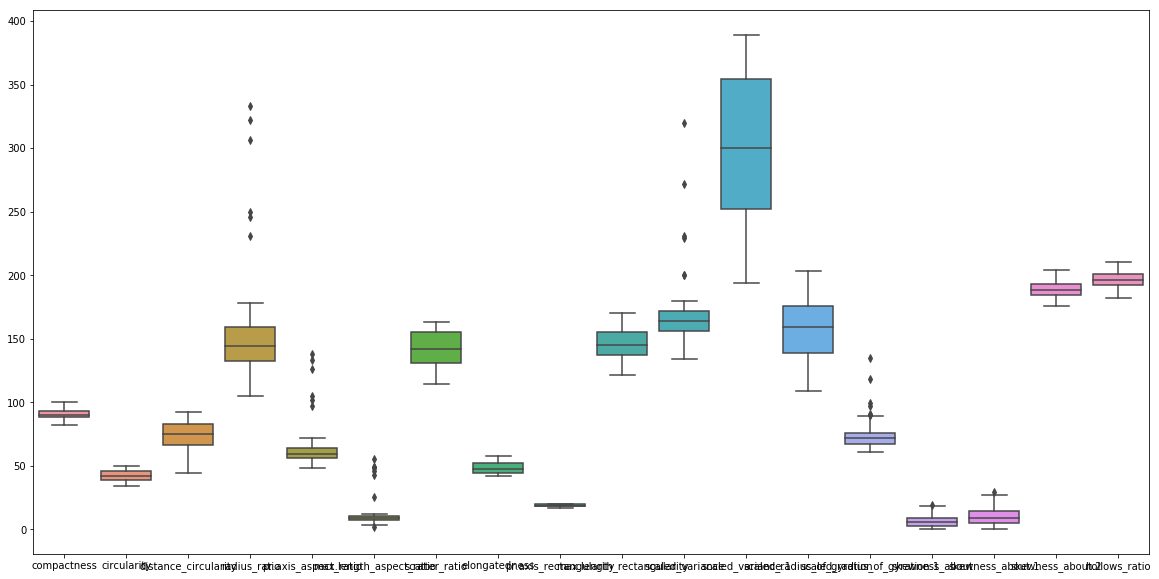

In [229]:
plt.figure(figsize=(20,10))
sns.boxplot( data = van )

In [230]:
col_vals = range(len(van.columns)-1)
for col in col_vals:
    q1 = van.iloc[:,col].quantile(0.25)
    q3 = van.iloc[:,col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    van.iloc[:,col] = np.where(van.iloc[:,col] < lower_bound, lower_bound, van.iloc[:,col])
    van.iloc[:,col] = np.where(van.iloc[:,col] > upper_bound, upper_bound, van.iloc[:,col])

 Box plot after outliers have been treated for the for the dataset : class = van


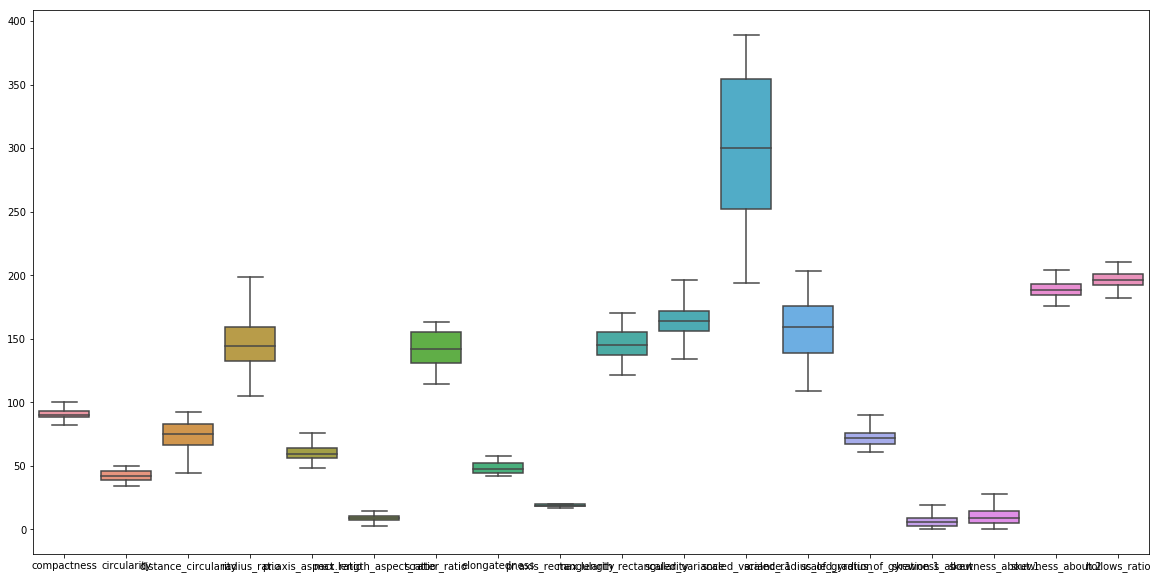

In [239]:
print("\033[94m\033[1m Box plot after outliers have been treated for the for the dataset :\x1b[0m", "class = van")
plt.figure(figsize=(20,10))
sns.boxplot( data = van )

In [232]:
car = vehicle_df[vehicle_df["class"] == 'car']
car.fillna(car.median(), inplace=True)
car.shape

(429, 19)

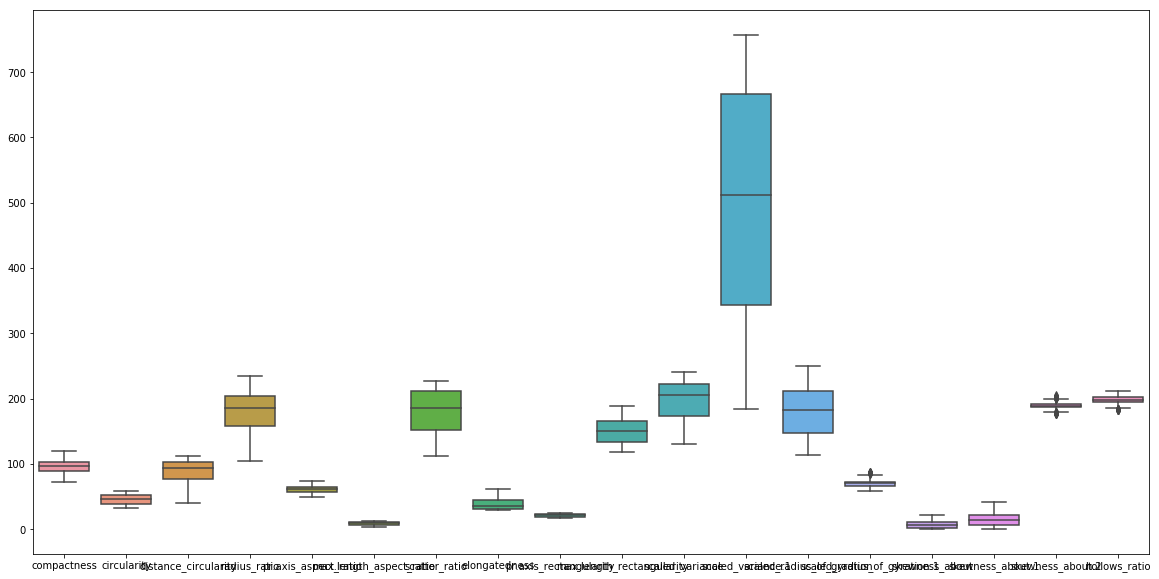

In [233]:
plt.figure(figsize=(20,10))
sns.boxplot( data = car )

In [234]:
col_vals = range(len(car.columns)-1)
for col in col_vals:
    q1 = car.iloc[:,col].quantile(0.25)
    q3 = car.iloc[:,col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    car.iloc[:,col] = np.where(car.iloc[:,col] < lower_bound, lower_bound, car.iloc[:,col])
    car.iloc[:,col] = np.where(car.iloc[:,col] > upper_bound, upper_bound, car.iloc[:,col])

 Box plot after outliers have been treated for the dataset : Class = car


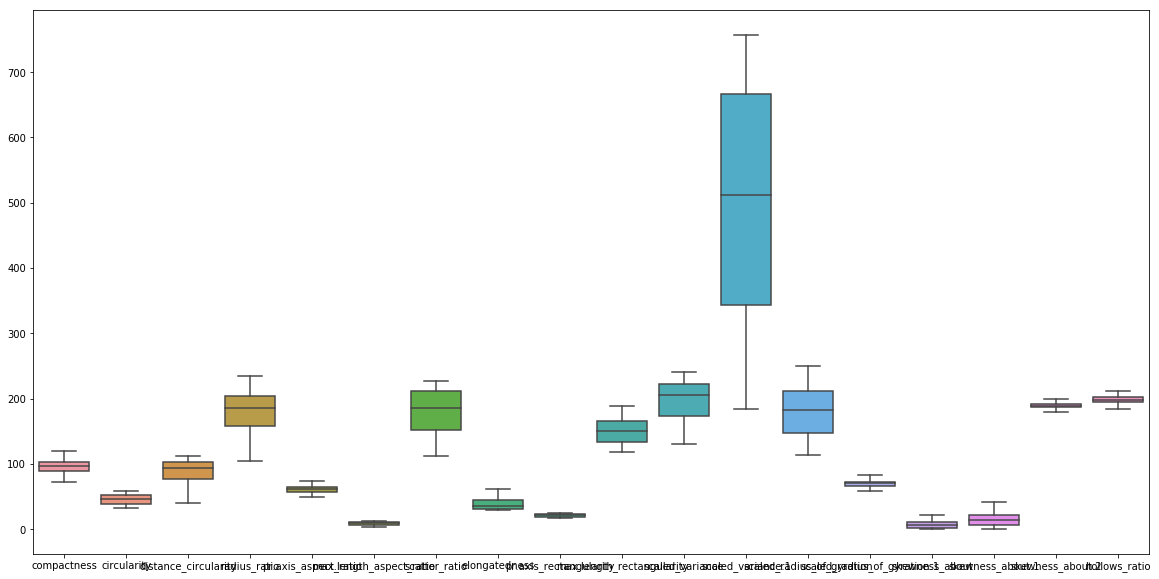

In [240]:
print("\033[94m\033[1m Box plot after outliers have been treated for the dataset :\x1b[0m", "Class = car")
plt.figure(figsize=(20,10))
sns.boxplot( data = car )

In [241]:
bus = vehicle_df[vehicle_df["class"] == 'bus']
bus.fillna(bus.median(), inplace=True)
bus.shape

(218, 19)

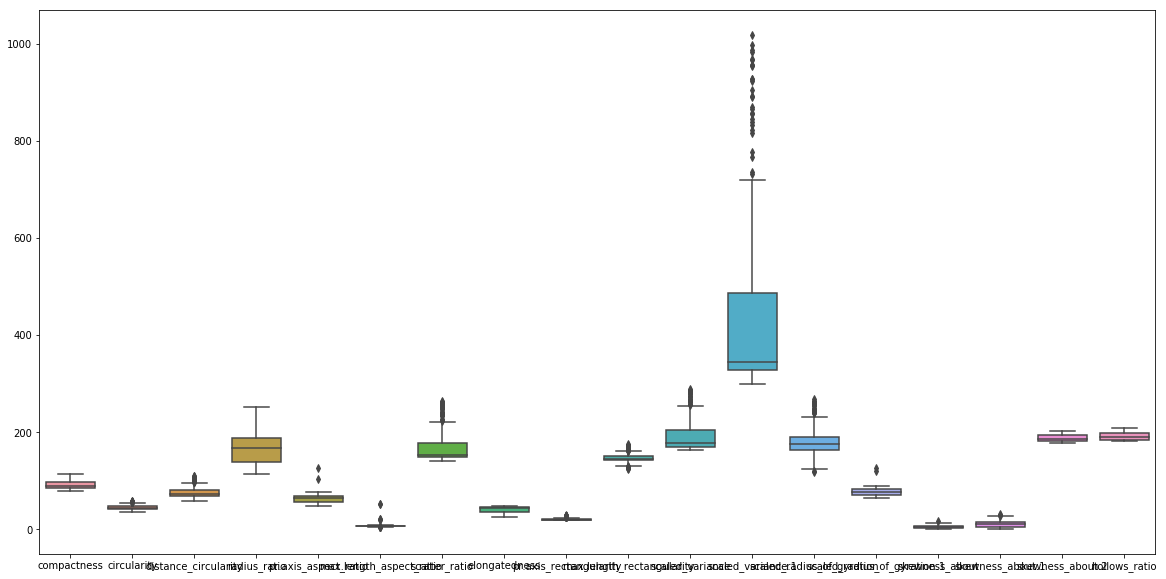

In [242]:
plt.figure(figsize=(20,10))
sns.boxplot( data = bus )

In [243]:
col_vals = range(len(bus.columns)-1)
for col in col_vals:
    q1 = bus.iloc[:,col].quantile(0.25)
    q3 = bus.iloc[:,col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    bus.iloc[:,col] = np.where(bus.iloc[:,col] < lower_bound, lower_bound, bus.iloc[:,col])
    bus.iloc[:,col] = np.where(bus.iloc[:,col] > upper_bound, upper_bound, bus.iloc[:,col])

 Box plot after outliers have been treated for the dataset : Class = bus


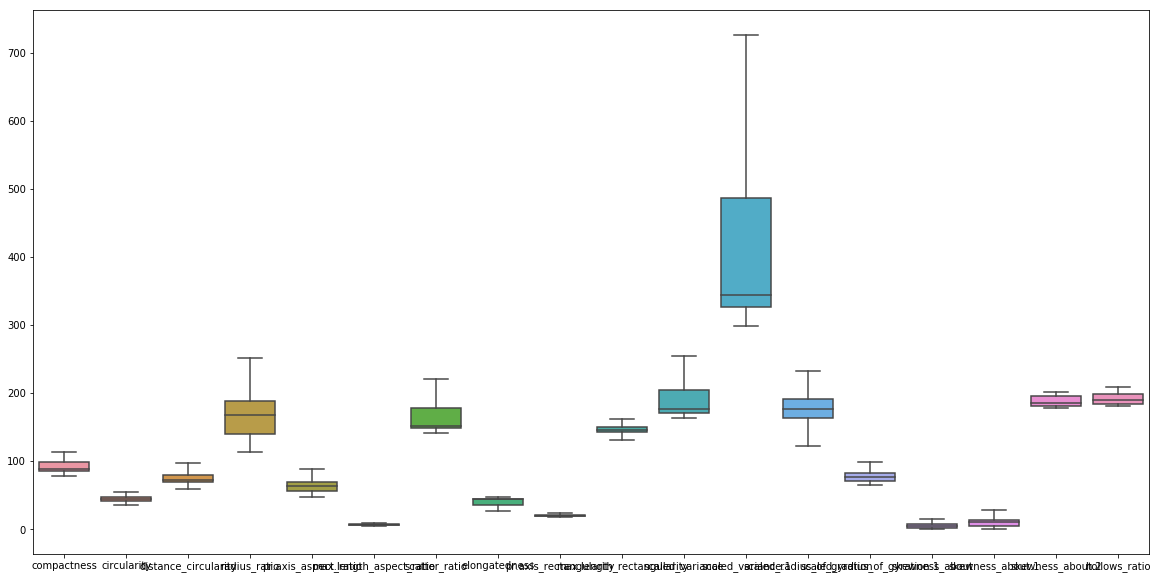

In [244]:
print("\033[94m\033[1m Box plot after outliers have been treated for the dataset :\x1b[0m", "Class = bus")
plt.figure(figsize=(20,10))
sns.boxplot( data = bus )

In [245]:
vehicle_df = pd.concat([car, van,bus])
vehicle_df.shape

(846, 19)

In [253]:
print("\033[94m\033[1mNote: There is NO mmissing value and outlier in the dataset after the missing values and outliers were treated with the respective class meadian and (upper and lower) IQR.\x1b[0m")

Note: There is NO mmissing value and outlier in the dataset after the missing values and outliers were treated with the respective class meadian and (upper and lower) IQR.


2.Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

In [254]:
print("\033[94m\033[1mCorrelation Matrix of the dataset:\x1b[0m")
print("-"*35)
vehicle_df.corr()

Correlation Matrix of the dataset:
-----------------------------------


compactness  circularity  distance_circularity  \
compactness                     1.000000     0.682061              0.780447   
circularity                     0.682061     1.000000              0.786404   
distance_circularity            0.780447     0.786404              1.000000   
radius_ratio                    0.729520     0.647597              0.806752   
pr.axis_aspect_ratio            0.160034     0.202100              0.238542   
max.length_aspect_ratio         0.471686     0.555062              0.669373   
scatter_ratio                   0.811274     0.850557              0.907523   
elongatedness                  -0.788123    -0.818741             -0.901204   
pr.axis_rectangularity          0.812856     0.851679              0.906240   
max.length_rectangularity       0.666065     0.959212              0.768398   
scaled_variance                 0.783468     0.809367              0.874071   
scaled_variance.1               0.822591     0.848814              0.899575   
scaled_radius_of_gyration       0.578615     0.933396              0.693417   
scaled_radius_of_gyration.1    -0.262369     0.051705             -0.271242   
skewness_about                  0.236842     0.145822              0.114395   
skewness_about.1                0.156777    -0.014667              0.267653   
skewness_about.2                0.299739    -0.099795              0.164610   
hollows_ratio                   0.363200     0.051717              0.357465   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.729520              0.160034   
circularity                      0.647597              0.202100   
distance_circularity             0.806752              0.238542   
radius_ratio                     1.000000              0.660873   
pr.axis_aspect_ratio             0.660873              1.000000   
max.length_aspect_ratio          0.475776              0.197724   
scatter_ratio                    0.800159              0.203133   
elongatedness                   -0.833201             -0.270237   
pr.axis_rectangularity           0.785420              0.188322   
max.length_rectangularity        0.589447              0.167779   
scaled_variance                  0.814934              0.247365   
scaled_variance.1                0.799103              0.197118   
scaled_radius_of_gyration        0.564232              0.166778   
scaled_radius_of_gyration.1     -0.348748             -0.204129   
skewness_about                   0.058725             -0.057476   
skewness_about.1                 0.183009             -0.031067   
skewness_about.2                 0.413427              0.367280   
hollows_ratio                    0.492596              0.376618   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.471686       0.811274   
circularity                                 0.555062       0.850557   
distance_circularity                        0.669373       0.907523   
radius_ratio                                0.475776       0.800159   
pr.axis_aspect_ratio                        0.197724       0.203133   
max.length_aspect_ratio                     1.000000       0.516768   
scatter_ratio                               0.516768       1.000000   
elongatedness                              -0.480514      -0.974030   
pr.axis_rectangularity                      0.539067       0.987834   
max.length_rectangularity                   0.657414       0.806011   
scaled_variance                             0.438120       0.962355   
scaled_variance.1                           0.493413       0.994257   
scaled_radius_of_gyration                   0.415342       0.783419   
scaled_radius_of_gyration.1                -0.268870      -0.059815   
skewness_about                              0.098553       0.078064   
skewness_about.1                            0.141072       0.218362   
skewness_about.2                            0.

Correlation Heatmap of the cars-dataset:
----------------------------------------


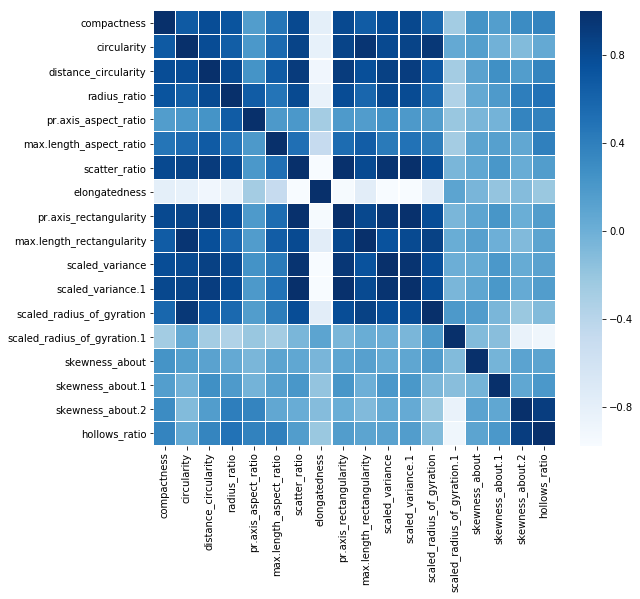

In [256]:
print("\033[94m\033[1mCorrelation Heatmap of the cars-dataset:\x1b[0m")
print("-"*40)
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(vehicle_df.corr(), ax = ax, cmap ="Blues", linewidths = 0.1) 

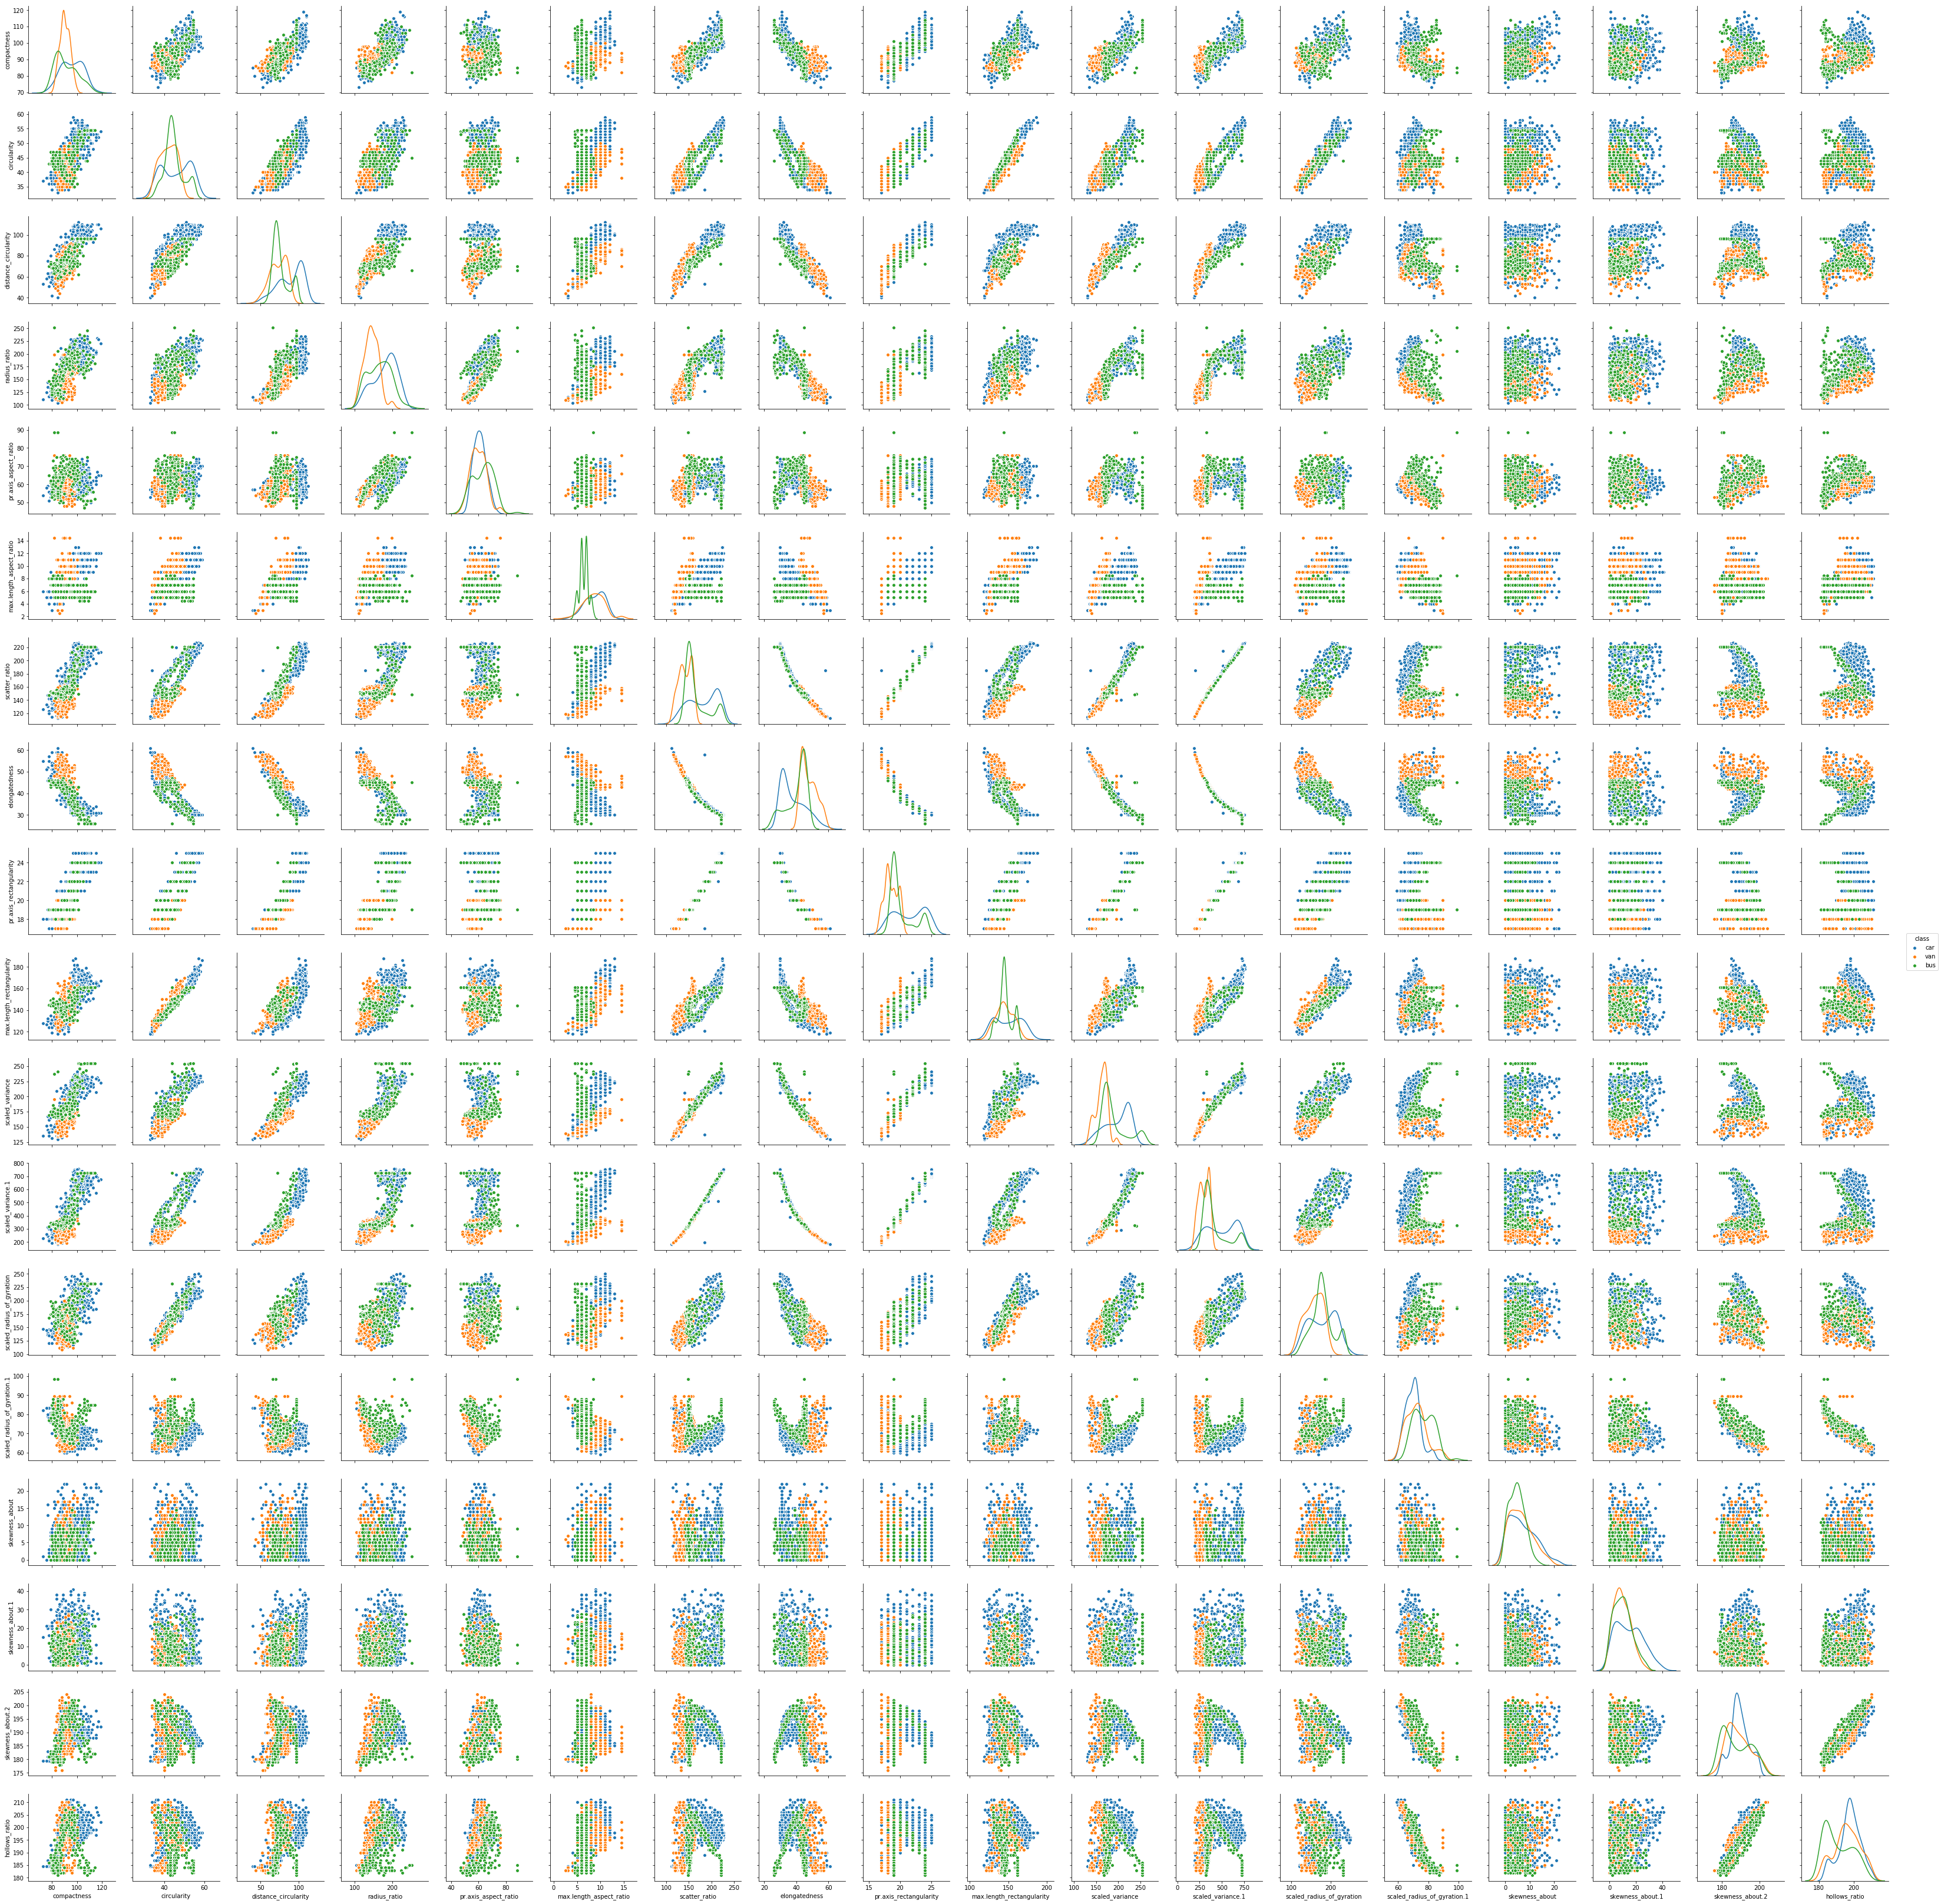

In [257]:
sns.pairplot(vehicle_df, diag_kind='kde', hue = "class")

Ans: If we look at the correlation table and the pair plots, it’s very difficult to make a decision that to drop a variable from the dataset. Hence, all the variables are going to be used in the model. As we are doing the dimension reduction using PCA, there is no harm to use the unsure variables in the model or estimation of PCA components.  

3.Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [408]:
X = vehicle_df.iloc[:,:-1].values
y = vehicle_df["class"].values

In [409]:
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4 , random_state=0)

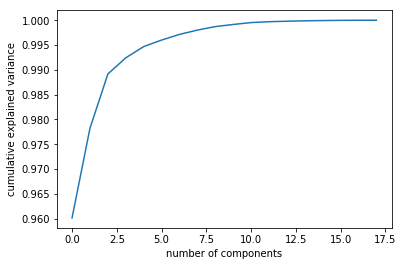

In [410]:
pca_train = PCA().fit(X_train)
pca_test = PCA().fit(X_test)
plt.plot(np.cumsum(pca_train.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [411]:
print("\033[94m\033[1mCumulative explained variance:\x1b[0m")
for i,col in enumerate(np.cumsum(pca_train.explained_variance_ratio_*100).tolist(),start=1):
    print (" PC {}. {} ".format(i,col))

Cumulative explained variance:
 PC 1. 96.01466278727914 
 PC 2. 97.82073528696422 
 PC 3. 98.91560754846543 
 PC 4. 99.2420469999257 
 PC 5. 99.46822632044437 
 PC 6. 99.60024154744761 
 PC 7. 99.71412133945586 
 PC 8. 99.80142038949023 
 PC 9. 99.87193629470292 
 PC 10. 99.91455227135793 
 PC 11. 99.95293814801559 
 PC 12. 99.97059332940123 
 PC 13. 99.9800701907444 
 PC 14. 99.98858214387955 
 PC 15. 99.9940185370801 
 PC 16. 99.9974078042732 
 PC 17. 99.9997150968287 
 PC 18. 99.99999999999999 


In [412]:
print("\033[94m\033[1mAns:The first principal component covers more than 95% of the variance \x1b[0m")

Ans:The first principal component covers more than 95% of the variance 


 4.Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

Note:Though we got more than 95% of the variance explained through one principal component (PC). Still I am going to use at least 5 PCs in this SVM prediction model.

In [413]:
X_train_pca = pd.DataFrame(pca_train.transform(X_train)).iloc[:,:5]
X_test_pca = pd.DataFrame(pca_test.transform(X_test)).iloc[:,:5]

In [414]:
import multiprocessing 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = [    {        
     'kernel': ['linear', 'rbf'],        
     'C': [ 0.01, 0.05, 0.5, 1 ]    } ]

In [415]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [416]:
gs.fit(X_train_pca, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf'], 'C': [0.01, 0.05, 0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [417]:
best_estimator = gs.best_estimator_

In [424]:
best_estimator

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [425]:
print("\033[94m\033[1mSVC(C=1, kernel='linear'):\x1b[0m")
print("-"*50)
best_estimator.fit(X_train_pca, y_train)
y_pred = best_estimator.predict(X_test_pca)
print("\033[94m\033[1mConfusion Matrix:\x1b[0m")  
print(confusion_matrix(y_test,y_pred)) 
print("\033[94m\033[1mAccuracy Matrix :\x1b[0m")
print(classification_report(y_test,y_pred))
print ("\033[94m\033[1mAccuracy:\x1b[0m", round(metrics.accuracy_score(y_test,y_pred),4))

SVC(C=1, kernel='linear'):
--------------------------------------------------
Confusion Matrix:
[[ 61  18   1]
 [ 28 128  22]
 [  4   3  74]]
Accuracy Matrix :
             precision    recall  f1-score   support

        bus       0.66      0.76      0.71        80
        car       0.86      0.72      0.78       178
        van       0.76      0.91      0.83        81

avg / total       0.79      0.78      0.78       339

Accuracy: 0.7758
